# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)



In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print ("Begining Data Retrieval")

# URL format: api.openweathermap.org/data/2.5/weather?APPID={APIKEY}&q={city name}
url = 'http://api.openweathermap.org/data/2.5/weather?APPID='
units = "imperial"
count = 1
set_number = 1

#List to hold the weather details of a city
weather_data = []


for city in cities:
    #build the query URL
    query_url = f"{url}{api_key}&units={units}&q={city}"
    #print (query_url)
    #break
        
    try:
        #retrive the response and JSONify it.
        response = requests.get(query_url).json()
 
        print (f"Processing Record {count} of Set {set_number} | {city}")
    
        #create a temp dictionary to hold the variables of interest
        city_weather = {}
        city_weather['City'] = response['name']
        city_weather['Cloudiness'] = response['clouds']['all']
        city_weather['Country'] = response['sys']['country']
        city_weather['Date'] = response['dt']
        city_weather['Humidity'] = response['main']['humidity']
        city_weather['Lat'] = response['coord']['lat']
        city_weather['Lng'] = response['coord']['lon']
        city_weather['Max Temp'] = response['main']['temp_max']
        city_weather['Wind Speed'] = response['wind']['speed']
    
        #Append the dictionary to the weather_data list
        weather_data.append(city_weather)
        
        
        if (count == 50): #if 50 records are saved, then reset count & incrment set_number
            print("reset count and increment set number")
            count = 1
            set_number = set_number + 1
        else:
            count = count +1 
            

            
    except KeyError:
        print ("City not found. Skipping")
        count = count + 1

Begining Data Retrieval
Processing Record 1 of Set 1 | galiwinku
City not found. Skipping
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | cabedelo
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | byron bay
Processing Record 14 of Set 1 | husavik
Processing Record 15 of Set 1 | huarmey
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping
Processing Record 17 of Set 1 | bairiki
City not found. Skipping
Processing Record 18 of Set 1 | manacapuru
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | lasa
Processing Record 21 of Set 1 | torbay
Processing Record 22 of Set 1 | hobar

Processing Record 31 of Set 4 | maniitsoq
Processing Record 32 of Set 4 | palu
Processing Record 33 of Set 4 | igrim
Processing Record 34 of Set 4 | dedougou
Processing Record 35 of Set 4 | coquimbo
Processing Record 36 of Set 4 | dudinka
Processing Record 37 of Set 4 | findlay
Processing Record 38 of Set 4 | sitka
Processing Record 39 of Set 4 | vagur
Processing Record 40 of Set 4 | barra da estiva
Processing Record 41 of Set 4 | san juan de los lagos
Processing Record 42 of Set 4 | dzhebariki-khaya
Processing Record 43 of Set 4 | marienburg
Processing Record 44 of Set 4 | zitlala
Processing Record 45 of Set 4 | assiniboia
Processing Record 46 of Set 4 | geresk
City not found. Skipping
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | hun
reset count and increment set number
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping
Processing Rec

Processing Record 14 of Set 8 | kieta
Processing Record 15 of Set 8 | limon
Processing Record 16 of Set 8 | kaitangata
Processing Record 17 of Set 8 | tucuman
Processing Record 18 of Set 8 | deputatskiy
Processing Record 19 of Set 8 | bud
Processing Record 20 of Set 8 | fortuna
Processing Record 21 of Set 8 | salinopolis
Processing Record 22 of Set 8 | merrill
Processing Record 23 of Set 8 | mandalgovi
Processing Record 24 of Set 8 | rudnya
Processing Record 25 of Set 8 | taoudenni
Processing Record 26 of Set 8 | jonkoping
Processing Record 27 of Set 8 | linxia
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | marcona
City not found. Skipping
Processing Record 30 of Set 8 | rafsanjan
Processing Record 31 of Set 8 | paucartambo
City not found. Skipping
Processing Record 32 of Set 8 | bengkulu
City not found. Skipping
Processing Record 33 of Set 8 | ribeira grande
Processing Record 34 of Set 8 | leiyang
Processing Record 35 of Set 8 | kosa
Processing Record 36 

Processing Record 46 of Set 11 | verkhoyansk
Processing Record 47 of Set 11 | sevierville
Processing Record 48 of Set 11 | nunoa
Processing Record 49 of Set 11 | dryden
Processing Record 50 of Set 11 | muisne
reset count and increment set number
Processing Record 1 of Set 12 | wick
Processing Record 2 of Set 12 | volgorechensk
Processing Record 3 of Set 12 | zhangye
Processing Record 4 of Set 12 | brzeg dolny
Processing Record 5 of Set 12 | ayr
Processing Record 6 of Set 12 | hohhot
Processing Record 7 of Set 12 | sao joaquim
Processing Record 8 of Set 12 | gotsu
Processing Record 9 of Set 12 | monroe
Processing Record 10 of Set 12 | ocean city
Processing Record 11 of Set 12 | yurla
Processing Record 12 of Set 12 | manokwari
Processing Record 13 of Set 12 | sampit
Processing Record 14 of Set 12 | canton
Processing Record 15 of Set 12 | xining
Processing Record 16 of Set 12 | la romana
Processing Record 17 of Set 12 | cayenne
Processing Record 18 of Set 12 | palauig
Processing Record 19

In [15]:
print (len(weather_data))

554


In [16]:
#convert to dataframe
city_weather_df = pd.DataFrame(weather_data, index=range(0, len(weather_data), 1))


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
print(city_weather_df.count())

#write to CSV
city_weather_df.to_csv("../output_data/cities_weather.csv")

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64


In [19]:
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Alfred,64,ZA,1541746128,91,-33.59,26.89,65.92,2.53
1,Nikolskoye,90,RU,1541743200,86,59.70,30.79,39.20,6.71
2,Airai,0,TL,1541746129,42,-8.93,125.41,86.17,1.68
3,Thompson,5,CA,1541743200,83,55.74,-97.86,-5.81,3.36
4,Hermanus,0,ZA,1541746129,76,-34.42,19.24,58.72,5.03


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

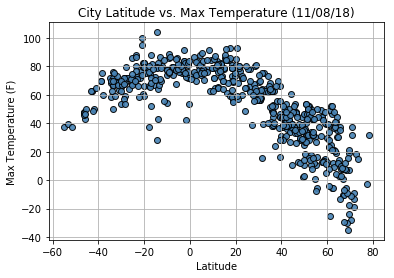

In [28]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Max Temp'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/08/18)")

plt.savefig("../output_data/Latitude_Vs_MaxTemperature.png")

plt.show()

#### Latitude vs. Humidity Plot

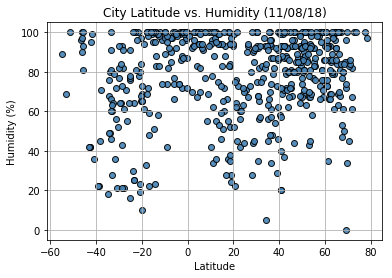

In [29]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Humidity'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/08/18)")


plt.savefig("../output_data/Latitude_Vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

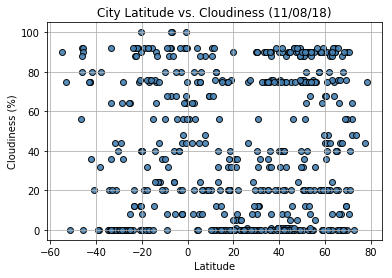

In [30]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Cloudiness'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/08/18)")


plt.savefig("../output_data/Latitude_Vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

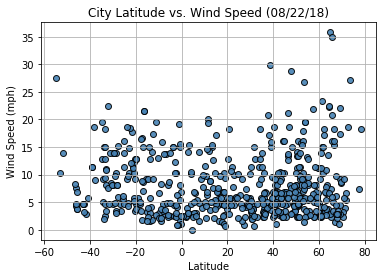

In [27]:
plt.scatter(city_weather_df['Lat'], city_weather_df['Wind Speed'], 
         color='steelblue', marker="o", edgecolors="black", alpha="0.9")
plt.grid(axis='both')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/08/18)")


plt.savefig("../output_data/Latitude_Vs_WindSpeed.png")

plt.show()